# Credit Card Fraud Detection - Capstone Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.isnull().any().sum() # to see if any value is missing

0

In [5]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where transaction is fraud
n_fraud = len(data[data.Class == 1])

# TODO: Number of records where transaction is normal
n_normal = len(data[data.Class == 0])

# TODO: Percentage of records where transaction is fraud
fraud_percent = n_fraud * 100.0 / n_records

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Number of Fraud transaction: {}".format(n_fraud))
print ("Number of Normal transaction: {}".format(n_normal))
print ("Percentage of fraud transacation: {:.2f}%".format(fraud_percent))

Total number of records: 284807
Number of Fraud transaction: 492
Number of Normal transaction: 284315
Percentage of fraud transacation: 0.17%


Lets visualize when people shop and when credit fraud happens and if there is a pattern. For this however we need to convert time from seconds to days, hours and weeks

In [6]:
# As the time provided is in seconds we can use it as seconds since epoch as we won't care about years
import datetime
def convert_totime(seconds):
    return datetime.datetime.fromtimestamp(seconds);

timeAnalysis = data[['Time', 'Amount', 'Class']].copy()
timeAnalysis['datetime'] = timeAnalysis.Time.apply(convert_totime)
# As the max time is 172792 seconds and 172792 / (60*60) is about 48 hrs so we only have data for 2 days so only 
# plotting data against hours make sense
timeAnalysis['hour of the day'] = timeAnalysis.datetime.dt.hour
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'hour of the day'])['Amount'].count()

In [7]:
#Assuming that Kaggle's server is running in UTC
timeDelta = datetime.datetime.utcnow() - datetime.datetime.now() 
timeAnalysis['hour of the day'] = timeAnalysis.datetime + timeDelta
timeAnalysis['hour of the day'] = timeAnalysis['hour of the day'].dt.hour
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'hour of the day'])['Amount'].count()

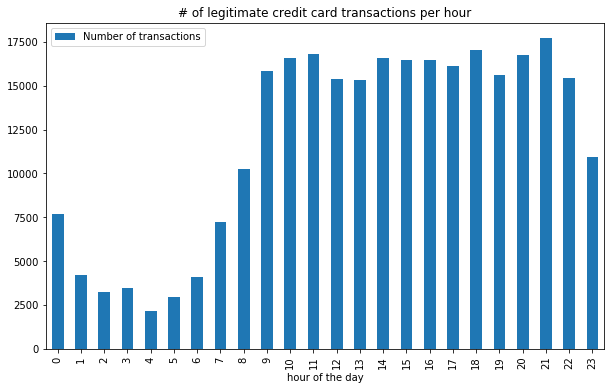

In [8]:
plt.figure(figsize = (10, 6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = '# of legitimate credit card transactions per hour', legend = True)
plt.show()

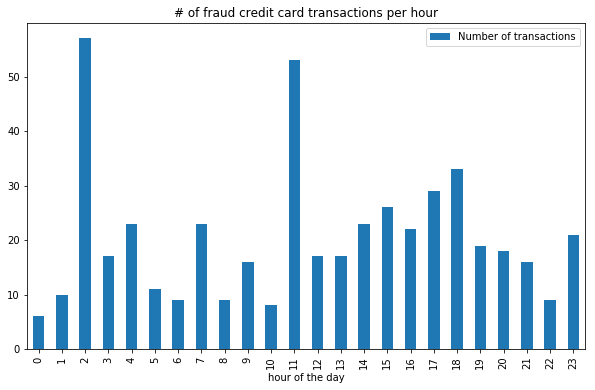

In [9]:
plt.figure(figsize = (10, 6))
fraudTransactions = timeAnalysisGrouped[1].copy()
fraudTransactions.name = 'Number of transactions'
fraudTransactions.plot.bar(title = '# of fraud credit card transactions per hour', legend = True)
plt.show()

It is clear that the fraud transactions are better spread out than the legitimate transactions. This can be due to the fact that there are very few fradulent transactions and hence they won't have a clear trend like in the case of legitimate transactions.

It would be interesting to see if fraudulent transactions are in general of higher value than normal transactions or not. To check this lets setup a hypothesis test. Lets define our Null and Alternative hypothesis

H0 : Fraudulent transactions are of similar or lower value as normal transactions

HA : Fraudulent transactions are of higher value as normal transactions

I took H0 to be similar or lower because H0 and HA should together cover all the possibilities
Before we begin lets first look at the distribution of amounts of transaction done

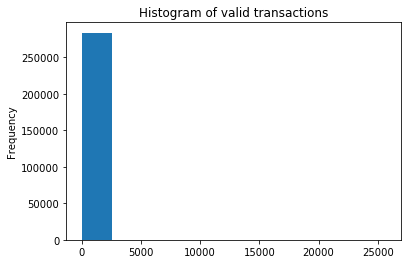

In [10]:
# Valid Transactions
timeAnalysis[timeAnalysis.Class == 0].Amount.plot.hist(title = 'Histogram of valid transactions')
plt.show()

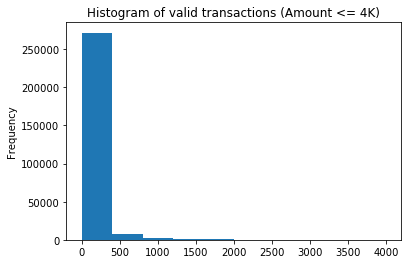

In [11]:
# As the value of most transaction seems to be only about 2K - 2.5K. Lets limit the data further
timeAnalysis[(timeAnalysis.Class == 0) & (timeAnalysis.Amount <= 4000)].Amount.plot.hist\
            (title = 'Histogram of valid transactions (Amount <= 4K)')
plt.show()

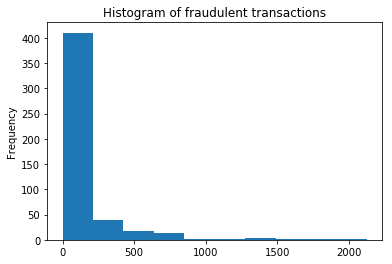

In [12]:
# Now lets look at the Fraudulent transactions
timeAnalysis[timeAnalysis.Class == 1].Amount.plot.hist(title = 'Histogram of fraudulent transactions')
plt.show()

There doesn't appears to be any difference visually. Lets perform the hypothesis test to draw the final conclusion.

For the hypothesis test I will be performing a Z-test, with the valid transactions acting as the population. 
We will be performing the test for 99% significance level, this means that we should get a z-score of atleast 2.326 or higher. The formula for z-score is

z−score=(x¯−μ)/S.E
 
Where
x¯  : mean of the sample

μ  : population mean

S.E : Standard Error

The standard error in our case is given by the formula :  σ/√n , where  σ  is the Standard deviation of the population and n is the sample size

In [13]:
population = timeAnalysis[timeAnalysis.Class == 0].Amount
sample = timeAnalysis[timeAnalysis.Class == 1].Amount
sampleMean = sample.mean()
populationStd = population.std()
populationMean = population.mean()

In [14]:
z_score = (sampleMean - populationMean) / (populationStd / sample.size ** 0.5)
z_score

3.0082898982097137

As the z-score is more than 2.326 we reject the Null hypothesis. So there is a 99% chance that the amount spend on fraudulent transactions are on average significantly higher than normal transactions. But as we observed in the histograms in absolute terms normal transactions are of higher value.

Lets now perform a hypothesis test for each of the 28 features to see if the feature value for the fraud data is significantly different from the valid transaction or not. The significance level for this experiment will be 99% and it will be a 2-tailed test. The corresponding z-critical value is 3.37

In [15]:
# Gettting the PDA columns
PDA_columns = [x for x in data.columns if 'V' in x]

valid_transactions = data[data.Class == 0]
Fraud_transactions = data[data.Class == 1]
#Getting the number of rows
sample_size = Fraud_transactions.shape[0]
for col in PDA_columns:
    mean = valid_transactions[col].mean()
    std = valid_transactions[col].std()
    zScore = (Fraud_transactions[col].mean() - mean) / (std/sample_size**0.5)
    print ('Column', col, 'is', 'Significant' if abs(zScore) >= 3.37 else 'insignificant')

Column V1 is Significant
Column V2 is Significant
Column V3 is Significant
Column V4 is Significant
Column V5 is Significant
Column V6 is Significant
Column V7 is Significant
Column V8 is Significant
Column V9 is Significant
Column V10 is Significant
Column V11 is Significant
Column V12 is Significant
Column V13 is insignificant
Column V14 is Significant
Column V15 is insignificant
Column V16 is Significant
Column V17 is Significant
Column V18 is Significant
Column V19 is Significant
Column V20 is Significant
Column V21 is Significant
Column V22 is insignificant
Column V23 is insignificant
Column V24 is Significant
Column V25 is insignificant
Column V26 is insignificant
Column V27 is Significant
Column V28 is Significant


The amount spend on fraudulent transactions is on average significantly higher than normal transactions but in absolute terms higher amounts are spent on valid transaction. This means we can't really create an additional boolean feature such as 'If amount spent is higher than a given value', on the other hand there is significant difference in average amount spent, maybe it can be used to identify frauds.

Also, as it would seem as per my calculation the fraudulent transactions are more spread out during the day as compared to normal transactions. Maybe scrutinizing late night transactions can lead to a better detection rate. Finally, features - V13, V15, V22, V23, V25, V26 are not very good at differentiating between fraud and valid transactions. So, maybe removing them will lead to a better result.

In [3]:
#Drop all of the features that have very similar distributions between the two types of transactions.
data = data.drop(['V13','V15','V22','V23','V25', 'V26'], axis =1)

In [4]:
data['Night'] = ((np.mod(np.floor(data['Time']/60/60),24) <= 9)*1).astype('category')
# Night = 1 implies that the transaction happened before 9 A.M.
data['Hour'] = (np.floor(data['Time']/60/60)).astype('category')
del data['Time']
data= pd.get_dummies(data)

In [19]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,Hour_38.0,Hour_39.0,Hour_40.0,Hour_41.0,Hour_42.0,Hour_43.0,Hour_44.0,Hour_45.0,Hour_46.0,Hour_47.0
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,0.029989,0.030284,0.030431,0.029086,0.029606,0.026878,0.027303,0.027415,0.022696,0.017050
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,0.170556,0.171367,0.171771,0.168049,0.169498,0.161727,0.162964,0.163290,0.148933,0.129458
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

y = data['Class']
data = data.drop(['Class'], axis = 1)
X = data.values
y = y.values

#Normalizing the data set for better performance of the model
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

skf = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state =43)

for valid_train_is, valid_test_is in skf.split(X, y):
        X_train = X[valid_train_is]
        y_train = y[valid_train_is]
        X_test = X[valid_test_is]
        y_test = y[valid_test_is]

In [21]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, average_precision_score, roc_auc_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
   
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    
    
    # Get the predictions on the test set and training set,
  
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
            
    #Compute accuracy on training samples
    results['auprc_train'] = average_precision_score(y_train, predictions_train)
        
    # TODO: Compute accuracy on test set
    results['auprc_test'] = average_precision_score(y_test, predictions_test)
    
    # TODO: Compute F-score on training samples
    results['f_train'] = fbeta_score( y_train, predictions_train, beta=5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=5)
    
    # TODO: Compute accuracy on training samples
    results['auroc_train'] = roc_auc_score(y_train, predictions_train)
        
    # TODO: Compute accuracy on test set
    results['auroc_test'] = roc_auc_score(y_test, predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    print(results)
    return results

In [25]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=40)
clf_B = SGDClassifier(random_state=40)
clf_C = SVC(random_state=40)
          
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    samples = len(X_train)
        
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
    print("-------------------------------------------------------------------------------------------------------------------")

DecisionTreeClassifier trained on 227845 samples.
{'auroc_train': 1.0, 'f_test': 0.823943661971831, 'auroc_test': 0.91304548338750247, 'auprc_test': 0.79549000010910542, 'auprc_train': 1.0, 'f_train': 1.0}
-------------------------------------------------------------------------------------------------------------------
SGDClassifier trained on 227845 samples.
{'auroc_train': 0.76390663224680266, 'f_test': 0.60824742268041232, 'auroc_test': 0.800906100341093, 'auprc_test': 0.71108496387096909, 'auprc_train': 0.71264342515425383, 'f_train': 0.53640150763737349}
-------------------------------------------------------------------------------------------------------------------
SVC trained on 227845 samples.
{'auroc_train': 0.89338562729871851, 'f_test': 0.77136075949367078, 'auroc_test': 0.88262668249629617, 'auprc_test': 0.86362418097233795, 'auprc_train': 0.88254434160705297, 'f_train': 0.7927608930854726}
---------------------------------------------------------------------------------

In [28]:
results = {}
results['DecisionTreeClassifier'] = {'auroc_train': 1.0, 'f_test': 0.823943661971831, 'auroc_test': 0.91304548338750247,
                                     'auprc_test': 0.79549000010910542, 'auprc_train': 1.0, 'f_train': 1.0}

results['SGDClassifier'] = {'auroc_train': 0.76390663224680266, 'f_test': 0.60824742268041232,
                            'auroc_test': 0.800906100341093,'auprc_test': 0.71108496387096909,
                            'auprc_train': 0.71264342515425383, 'f_train': 0.53640150763737349}

results['SVC'] = {'auroc_train': 0.89338562729871851, 'f_test': 0.77136075949367078, 'auroc_test': 0.88262668249629617,
                  'auprc_test': 0.86362418097233795, 'auprc_train': 0.88254434160705297, 'f_train': 0.7927608930854726}

In [75]:
# Import supplementary visualization code visuals.py
import visual_final as vs

C:\Users\Lenovo\visual_final.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ax[j/3, j%3].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
C:\Users\Lenovo\visual_final.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ax[j/3, j%3].set_xlim((-0.5, 3.0))


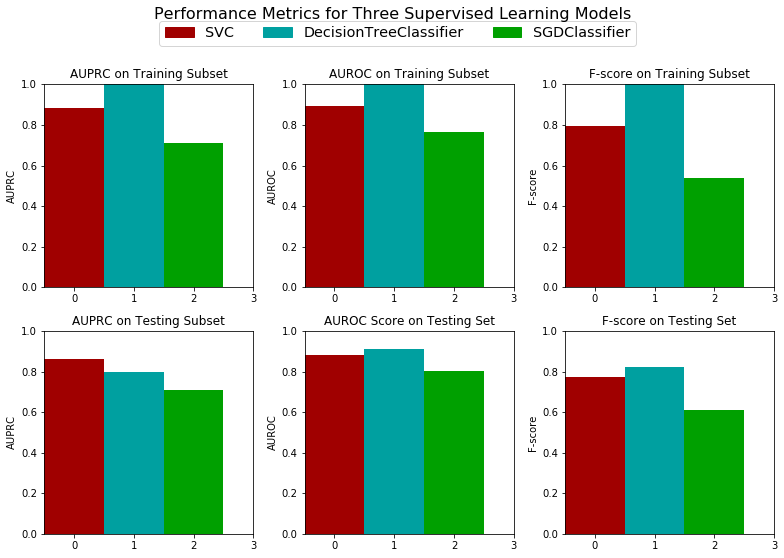

In [76]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results)

F-beta score, AUPRC, AUROC are calculated for both training and test set for all three classifiers. The results for test set are shown below:

Classifier | F-beta | AUPRC | AUROC

Decision Tree  | 0.8239 | 0.7955 | 0.9130 (The Best of Three)

SGDClassifier  | 0.6082 | 0.7111 | 0.8009 

SVC  | 0.7714 |  0.8636 | 0.8826

From the above visuals following points can be noted easily:

Decision Tree Classifier has shown better results than other two classifiers, though it has a little less AUPRC score than that of SVC. Furthermore, running time of the Decision Tree Classifier is very less compared to the other two classifiers, though it has not been displayed explicitly in the visuals. DecisionTreeClassifier() results highest AUROC and F-beta score both on training and testing set.

Therefore, observing the above plots I would like to cast my vote for DecisionTreeClassifier() for this particular model to identify fraud transactions minimizing the false_neagtive rate.

Next, the hyper-parameters of Decision Tree Classifier will be tuned using GridSearchCV to improve the model further.

Unoptimized model
------
AUPRC on testing data: 0.7955
AUROC on testing data: 0.9130
F-score on testing data: 0.8239

Optimized Model
------
Final AUPRC on the testing data: 0.8293
Final AUROC the testing data: 0.8826
Final F-score on the testing data: 0.7695
Area Under P-R Curve:  0.829109801879


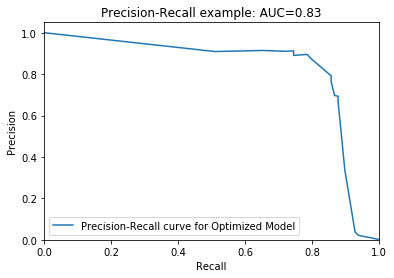

In [30]:
#Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import pylab as pl

#Initialize the classifier
clf = DecisionTreeClassifier(random_state=40)

# TODO: Create the parameters list you wish to tune
parameters = {'min_weight_fraction_leaf': [0, .1, .5],
              'max_features': [None, 'sqrt', 'log2'],
              'max_depth':[5,8,15,None],
              'min_samples_split':[5,10,20],
              'min_samples_leaf':[5,10,20],
              }
# TODO: Make an fbeta_score scoring object
scorer = make_scorer(average_precision_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("AUPRC on testing data: {:.4f}".format(average_precision_score(y_test, predictions)))
print ("AUROC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 5)))
print ("\nOptimized Model\n------")
print ("Final AUPRC on the testing data: {:.4f}".format(average_precision_score(y_test, best_predictions)))
print ("Final AUROC the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 5)))

probas_ = best_clf.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probas_[:, 1])
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve for Optimized Model')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

Value of the evaluation metrics has been significantly improved by the tuning of hyper-parameter of the model using GridSearchCV technique.

Area Under Precision-Recall Curve has increased upto 0.83, which is pretty demanding for a problem having highly imbalanced datset to minimize the number of False_Negative(FN).

Though, Area Under Receiver Operating Characteristic has decreased a little bit from 0.9130 to 0.8826, this change is quite small. Lets draw the ROC curve for the Optimized Model.

In [35]:
print ("Parameters for the best classifier:")
best_clf.get_params(deep=True)

Parameters for the best classifier:


{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0,
 'presort': False,
 'random_state': 40,
 'splitter': 'best'}

Area Under ROC Curve:  0.965769113991


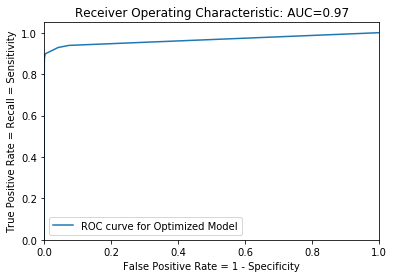

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pylab as pl

best_clf = DecisionTreeClassifier(max_depth = 8, max_features = None, min_weight_fraction_leaf = 0, min_samples_leaf = 10,
                                  min_samples_split = 5, random_state = 40)
best_clf.fit(X_train, y_train)
probas_ = best_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
area = auc(fpr, tpr)
print("Area Under ROC Curve: ",area)

pl.clf()
pl.plot(fpr, tpr, label='ROC curve for Optimized Model')
pl.xlabel('False Positive Rate = 1 - Specificity')
pl.ylabel('True Positive Rate = Recall = Sensitivity')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Receiver Operating Characteristic: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

Now lets take a look at the confusion matrix for the Optimized Model

In [104]:
from sklearn.metrics import confusion_matrix

cnf_mat = confusion_matrix(y_test, best_clf.predict(X_test))

print("Number of True Negatives: {}".format(cnf_mat[0][0]))
print("Number of True Positives: {}".format(cnf_mat[1][1]))
print("Number of False Negatives: {}".format(cnf_mat[1][0]))
print("Number of False Positives: {}".format(cnf_mat[0][1]))
print()
print("True Positive Rate = Recall = Sensitivity: {}".format(cnf_mat[1][1] / (cnf_mat[1][1] + cnf_mat[1][0])))
print()
print("Precision: {}".format(cnf_mat[1][1] / (cnf_mat[1][1] + cnf_mat[0][1])))
print()
print("False Positive Rate = 1 - Specificity: {}".format(cnf_mat[0][1] / (cnf_mat[0][0] + cnf_mat[0][1])))

Number of True Negatives: 56855
Number of True Positives: 75
Number of False Negatives: 23
Number of False Positives: 9

True Positive Rate = Recall = Sensitivity: 0.7653061224489796

Precision: 0.8928571428571429

False Positive Rate = 1 - Specificity: 0.00015827236916150816


The results shown by the optimized model are quite impressive. Following points can be made out of this observation

a) 76.5% of the actual fraud transactions will be detected by this model.

b) 89.3% transactions are actually fraudulent out all transactions detected as fraudulent.

c) 0.016% actual normal transactions are wrongly categorized as fraudulent.

Having optimized the DecisionTreeClassifier model, I would like to explore the dataset further using Deep Learning library TensorFlow to see how it behaves.

In [6]:
#Lets modify the data set to explore them using tensorflow library
inputX = X_train
inputY = y_train
inputX_test = X_test
inputY_test = y_test

In [7]:
inputY = (np.arange(2) == inputY[:,None]).astype(np.float32)

inputY_test = (np.arange(2) == inputY_test[:,None]).astype(np.float32)

In [8]:
import tensorflow as tf

#Number of input nodes.
input_nodes = 73

#Multiplier maintains a fixed ratio of nodes between each layer.
mulitplier = 1.5 

#Number of nodes in each hidden layer
hidden_nodes1 = round(input_nodes * mulitplier)
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

#Percent of nodes to keep during dropout.
pkeep = 0.9

In [9]:
#input
x = tf.placeholder(tf.float32, shape = [None, input_nodes])
y = tf.placeholder(tf.float32, shape = [None, 2])

#layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.1))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

#layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.1))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

#layer 3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.1)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

#layer 4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.1)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

#output
y_ = y4

In [21]:
#Parameters
training_epochs = 2 #should be 2000, but the kernels dies from running for more than 1200 seconds.
display_step = 100
n_samples = y_train.size

batch = tf.Variable(0)

learning_rate = tf.train.exponential_decay(
  0.01,              #Base learning rate.
  batch,             #Current index into the dataset.
  len(inputX),       #Decay step.
  0.95,              #Decay rate.
  staircase=False)

In [18]:
#Cost function: Softmax Cross Entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_, labels=y))

#We will optimize our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#Correct prediction if the most likely value (Fraud or Normal) from softmax equals the target value.
predictions = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

AUROC = tf.contrib.metrics.streaming_auc(y_, y, num_thresholds=200, curve='ROC')

AUPRC = tf.contrib.metrics.streaming_auc(y_, y, num_thresholds=200, curve='PR')

In [19]:
#Initialize variables and tensorflow session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
sess.run(tf.local_variables_initializer())

In [22]:
auroc_summary = []
auprc_summary = []
cost_summary = []

for i in range(training_epochs):  
    sess.run([optimizer], feed_dict={x: inputX, y: inputY})
    
    # Display logs per epoch step
    if (i) % display_step == 0:
        train_auprc, train_auroc, newCost = sess.run([AUPRC, AUROC, cost], feed_dict={x: inputX, y: inputY})
        print ("Training step:", i,
               "AUPRC =", "{}".format(train_auprc),
               "AUROC =", "{}".format(train_auroc),
               "Cost = ", "{}".format(newCost))
        auprc_summary.append(train_auprc)
        auroc_summary.append(train_auroc)
        cost_summary.append(newCost)
        
print()
print ("Optimization Finished!")
print()
training_auprc = sess.run(AUPRC, feed_dict={x: inputX, y: inputY})
training_auroc = sess.run(AUROC, feed_dict={x: inputX, y: inputY})
print ("Training AUPRC=", training_auprc)
print ("Training AUROC=", training_auroc)
print()
testing_auprc = sess.run(AUPRC, feed_dict={x: inputX_test, y: inputY_test})
testing_auroc = sess.run(AUROC, feed_dict={x: inputX_test, y: inputY_test})
print ("Testing AUPRC=", testing_auprc)
print ("Testing AUROC=", testing_auroc)

Training step: 0 AUPRC = (0.99870306, 0.99870306) AUROC = (0.99827075, 0.99827075) Cost =  0.3150656223297119

Optimization Finished!

Training AUPRC= (0.99870306, 0.99870306)
Training AUROC= (0.99827075, 0.99827075)

Testing AUPRC= (0.99870306, 0.9987036)
Testing AUROC= (0.99827075, 0.99827141)
